<span style="font-size: 3em;">FP20 Analytics December 2023 Challenge: Xmas Sales Analysis</span>

Source: [FP20 Analytics](https://zoomcharts.com/en/microsoft-power-bi-custom-visuals/challenges/fp20-analytics-december-2023?utm_source=challenge&utm_medium=fp20analytics&utm_campaign=fp20analytics_web_december&utm_term=register&utm_content=registration)

# Context

The dataset provided includes anonymized Christmas sales data across various product categories, customer demographics, and marketing campaigns.

Objective: uncover hidden insights of customer behavior during festive season. 

# Summary of Descriptive Analytics

1. Data Transformation 
* Adding new columns for easier analysis performed in analysis phase: `year`, `month`, `day_name`, `weekday`, `hour`.
* Transform `Date` data into `season`: Christmas season is during Nov and Jan next year. eg. Nov 2022 - Jan 2023 will be classified as `2022/2023`

2. Analysis
Look at PBI dashboard for detail.

# Analysis - Code

## Load data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
df = pd.read_excel("Xmas_Gift_Sales_Dataset_FP20C12.xlsx", parse_dates=['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_name'] = df['Date'].dt.day_name()
df['weekday'] = df['Date'].dt.weekday
df['hour'] = df['Time (Hr/Min)'].str.slice(0,2)

season = []
for ind, row in df.iterrows():
    if row['month'] == 11 or row['month'] == 12:
        season.append(f'{int(row["year"])}/{int(row["year"] + 1)}')
    elif row['month'] == 1:
        season.append(f'{int(row["year"] - 1)}/{int(row["year"])}')
df['season'] = season
df = df[df['season']!='2017/2018'] # drop b/c of insufficient data for this season

df.head()

,Date,Time (Hr/Min),Customer Age Range,Product Type,Product Category,Product Name,Purchase Type,Country,City,Gender,...,Unit Cost,Cost,Total Sales,Profit,year,month,day_name,weekday,hour,season
0,2021-01-05,08:53,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,Italy,Venice,Female,...,58.19,58.19,238.55,180.36,2021,1,Tuesday,1,08,2020/2021
1,2020-01-11,18:47,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,Netherlands,Amsterdam,Female,...,32.56,32.56,133.49,100.93,2020,1,Saturday,5,18,2019/2020
2,2019-01-01,08:20,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,Austria,Salzburg,Female,...,58.32,58.32,239.09,180.77,2019,1,Tuesday,1,08,2018/2019
3,2019-01-10,15:40,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,France,Lyon,Female,...,52.89,52.89,216.82,163.93,2019,1,Thursday,3,15,2018/2019
4,2021-01-24,17:16,1 to 11,Children,Toys,Hot Wheels Car Set,In-store,Italy,Naples,Male,...,21.41,21.41,87.76,66.35,2021,1,Sunday,6,17,2020/2021


## Customer Segmentation

While in-store method prefers Cash, online method prefers Credit Card


,Purchase Type,Payment Method,Total Sales,pct_of_total
0,In-store,Cash,11453485.68,32.57
1,In-store,Credit Card,4134346.95,11.76
5,Online,Credit Card,3699540.67,10.52
4,In-store,PayPal,3294861.60,9.37
9,Xmas Market,Cash,2547811.72,7.25


,Gender,Xmas Budget,Total Sales,pct_of_total
0,Female,High,6038620.72,17.17
2,Female,Medium,5925917.17,16.85
5,Male,Medium,5832761.50,16.59
3,Male,High,5822701.47,16.56
4,Male,Low,5793804.31,16.48
1,Female,Low,5752386.57,16.36


Customers aged 1-11 with Medium Xmas Budget take dominant, while 12-17 and 18+ age groups have high Xmas Budget most


,Customer Age Range,Xmas Budget,Total Sales,pct_of_total
2,1 to 11,Medium,4718904.33,13.42
1,1 to 11,Low,4497452.85,12.79
0,1 to 11,High,4423179.86,12.58
3,12 to 17,High,3752594.28,10.67
6,18 over,High,3685548.05,10.48
4,12 to 17,Low,3570919.23,10.15
8,18 over,Medium,3566910.75,10.14
7,18 over,Low,3477818.80,9.89
5,12 to 17,Medium,3472863.59,9.88


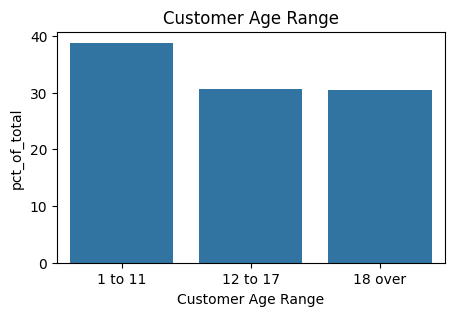

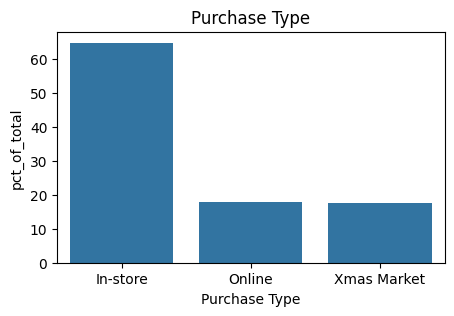

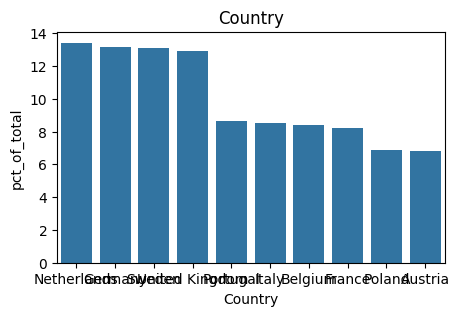

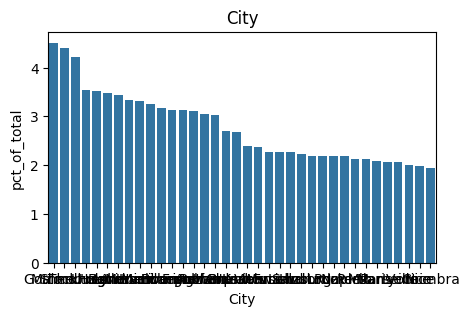

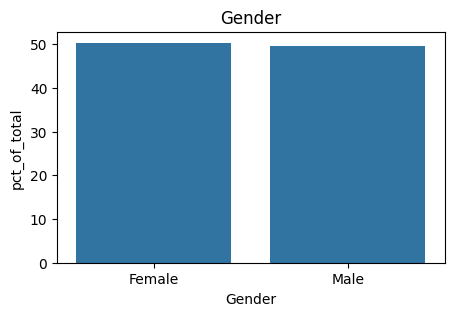

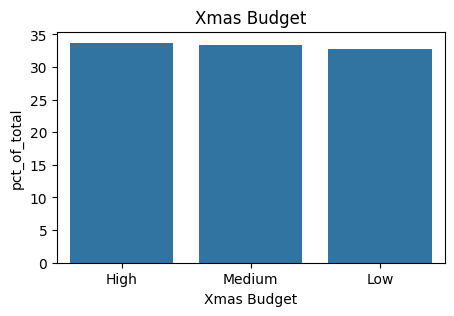

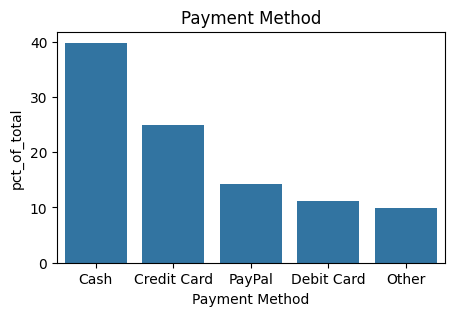

In [3]:
def sales_by_cat(independent_var): # Total Sales by categorical variables  
    temp = df.groupby(independent_var)['Total Sales'].sum().reset_index()
    temp['pct_of_total'] = round(temp['Total Sales'] / temp['Total Sales'].sum() * 100, 2)
    temp.sort_values('Total Sales', ascending=False, inplace=True)
    return temp

def viz_bar(var): # create visualization from the above function
    temp = sales_by_cat(var)
    plt.figure(figsize=(5,3))
    sns.barplot(data=temp, x=var, y='pct_of_total')
    plt.title(var)
    plt.show()

print('While in-store method prefers Cash, online method prefers Credit Card')
display(sales_by_cat(['Purchase Type', 'Payment Method']).head(5))

display(sales_by_cat(['Gender', 'Xmas Budget']))

print('Customers aged 1-11 with Medium Xmas Budget take dominant, while 12-17 and 18+ age groups have high Xmas Budget most')
display(sales_by_cat(['Customer Age Range', 'Xmas Budget']))

viz_bar('Customer Age Range')
viz_bar('Purchase Type')
viz_bar('Country')
viz_bar('City')
viz_bar('Gender')
viz_bar('Xmas Budget')
viz_bar('Payment Method')
# viz_bar('Product Type')

Text(0.5, 1.0, 'Top 7 best selling products')

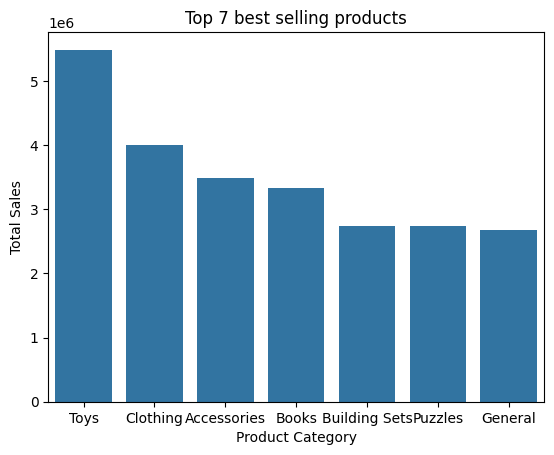

In [4]:
temp = sales_by_cat('Product Category')

temp['accumulated_pct'] = temp['pct_of_total'].expanding().sum()
temp2 = temp[temp['accumulated_pct'] < 70]
temp2

sns.barplot(data=temp2, x='Product Category', y='Total Sales')
plt.title('Top 7 best selling products')

Text(0.5, 1.0, 'Sales by Country')

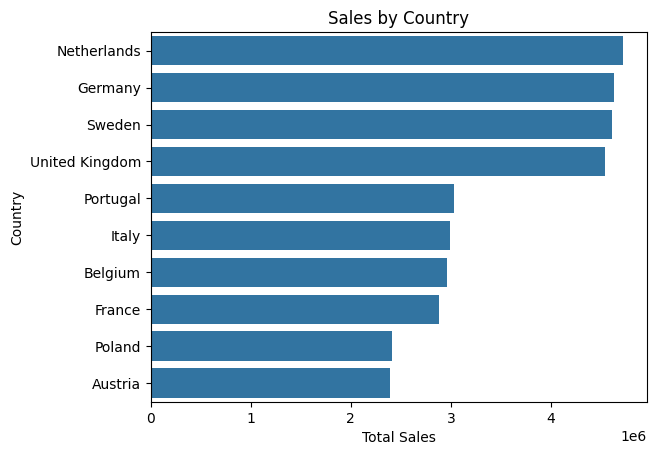

In [5]:
temp = sales_by_cat('Country')
sns.barplot(data=temp, y='Country', x='Total Sales')
plt.title('Sales by Country')

,Customer Age Range,Product Category,Total Sales,pct_in_cat,rank
3,1 to 11,Toys,5486389.55,40.2,1.0
0,1 to 11,Building Sets,2744685.22,20.1,2.0
2,1 to 11,Puzzles,2736788.44,20.1,3.0
1,1 to 11,General,2671673.83,19.6,4.0
7,12 to 17,Electronics,2257508.80,20.9,1.0
8,12 to 17,Video Games,2232373.22,20.7,2.0
5,12 to 17,Board Games,2145402.68,19.9,3.0
4,12 to 17,Accessories,2095139.37,19.4,4.0
6,12 to 17,Books,2065953.03,19.1,5.0
11,18 over,Clothing,4005861.90,37.3,1.0


Text(0.5, 1.0, 'Children prefer Toys, Adults prefer Clothing, while Teenagers have mixed preferences')

<Figure size 1000x600 with 0 Axes>

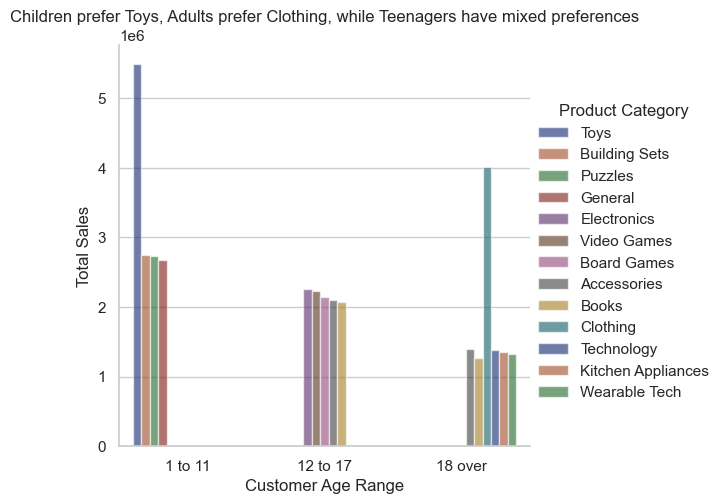

In [6]:
# Customer preferences
temp = df.groupby(['Customer Age Range', 'Product Category'])['Total Sales'].sum().reset_index()
temp.sort_values(['Customer Age Range', 'Total Sales'], ascending=[True, False], inplace=True)

pct_cat = []
for _, row in temp.iterrows():
    pct_cat.append(round(row['Total Sales'] / temp[temp['Customer Age Range'] == row['Customer Age Range']]['Total Sales'].sum() * 100,1))
temp['pct_in_cat'] = pct_cat

temp['rank'] = temp.groupby('Customer Age Range')['Total Sales'].rank(method='max', ascending=False)
display(temp)

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.catplot(data=temp, x='Customer Age Range', y="Total Sales", hue='Product Category',
            kind='bar', palette='dark', alpha=0.6) # alpha is transparency
plt.title('Children prefer Toys, Adults prefer Clothing, while Teenagers have mixed preferences')

# Time Series Analysis

In [7]:
temp = df.set_index('Date').resample('D')['Total Sales'].sum().reset_index()
# temp = df.groupby('Date').resample('D')['Total Sales'].sum().reset_index()

px.line(temp, x='Date', y='Total Sales', 
        title="High sales during December, lower sales at the beginning and at the end of Christmas season")

In [8]:
temp = df.groupby('season')['Total Sales'].sum().reset_index()
temp['pct_change'] = round(temp['Total Sales'].diff(1) / temp['Total Sales'].shift(1) * 100, 2)
display(temp)

px.bar(temp, x='season', y='Total Sales',
       title="Covid-19 had a slight impact on Total Sales")

,season,Total Sales,pct_change
0,2018/2019,7070788.32,NaN
1,2019/2020,7179146.24,1.53
2,2020/2021,6952131.28,-3.16
3,2021/2022,7086502.29,1.93
4,2022/2023,6877623.61,-2.95


In [9]:
temp = df.groupby(['Customer Age Range', 'season'])['Total Sales'].sum().reset_index()
children_pct = temp[temp['season']=='2022/2023'].groupby('Customer Age Range')['Total Sales'].sum() / sum(temp[temp['season']=='2022/2023']['Total Sales'])* 10

px.line(temp,
        x='season', y='Total Sales', color='Customer Age Range',
        title=f'Majority of customers are Children from aged 1-11 ({round(children_pct.iloc[0])}%), corresponding with substantial sales of Toys')

# Pricing & Promotion

In [10]:
# avg sales by weekday
temp = df.groupby(['weekday', 'day_name', 'Gender'])['Total Sales'].mean().reset_index()
temp.sort_values(['weekday'], ascending=True, inplace=True)

display(temp)
px.line(temp, x='day_name', y='Total Sales', color='Gender')

,weekday,day_name,Gender,Total Sales
0,0,Monday,Female,739.335859
1,0,Monday,Male,732.765791
2,1,Tuesday,Female,724.175122
3,1,Tuesday,Male,718.380681
4,2,Wednesday,Female,720.555200
5,2,Wednesday,Male,741.406805
6,3,Thursday,Female,694.378917
7,3,Thursday,Male,724.718393
8,4,Friday,Female,728.577410
9,4,Friday,Male,715.327522


In [11]:
# avg sales by weekday
temp = df.groupby(['weekday', 'day_name', 'Customer Age Range'])['Total Sales'].mean().reset_index()
temp.sort_values(['weekday'], ascending=True, inplace=True)

# display(temp)
px.line(temp, x='day_name', y='Total Sales', color='Customer Age Range')

In [12]:
temp = df.groupby('hour')['Total Sales'].sum().reset_index().sort_values('hour')

px.line(temp, x='hour', y='Total Sales', title='Total Sales by Hour')

In [13]:
temp = df.groupby('hour')['Total Sales'].mean().reset_index().sort_values('hour')

px.line(temp, x='hour', y='Total Sales', title='Average Sales by Hour')

In [14]:
temp = df.groupby(['Customer Age Range', 'hour'])['Total Sales'].sum().reset_index()#.sort_values('hour')
print(temp)
px.line(temp, x='hour', y='Total Sales', color='Customer Age Range', title='Total Sales by Hour')

   Customer Age Range hour  Total Sales
0             1 to 11   00     85192.59
1             1 to 11   01     60956.70
2             1 to 11   02     55792.74
3             1 to 11   03     64646.27
4             1 to 11   04     91950.43
..                ...  ...          ...
67            18 over   19    388786.39
68            18 over   20    438673.68
69            18 over   21    189899.93
70            18 over   22    230569.39
71            18 over   23    226542.25

[72 rows x 3 columns]
